## NH증권거래고객데이터 분석 

In [ ]:
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/NH거래고객데이터.csv')
df

,Unnamed: 0,계좌,성별,연령구간,투자성향,고객자산구간,주거래상품군,LIFESTAGE,고객등급,총투자기간,주거래업종구분
0,0,64aae8dd71e5c0761000db9f9a6779e504e7a4aa9dc097...,1,4,99,1,2,3,3,6,16
1,1,5f7c3a8f37d9c268d06130ff0be5d32a1b9ef68c13049f...,1,6,4,4,2,5,2,6,1
2,2,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,2,7,4,3,2,5,5,6,9
3,3,6d497facfa1ea5901b827335553331f8555fec02a8184f...,2,6,4,4,8,5,3,6,16
4,4,b727c78d2cfc246c97b677f29a034399a0c7e7873fff44...,1,5,2,2,2,5,5,5,16
...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,2fdd734bf8fc04c0d484ddc1d021622a1cdc802705702e...,1,9,4,2,2,9,5,2,16
9996,9996,720aa28d24bfa8fbeddf4fe625cb53af0a6f7ff2d526de...,2,2,3,1,2,2,9,1,16
9997,9997,7702030b3b0760e6b37c8a3e8ed58611b1b85913526ad1...,2,7,4,2,2,5,5,2,16
9998,9998,4006ddaa5673365096b9dd5965e20db866f6523c162f79...,1,5,99,5,2,5,3,2,5


In [ ]:
df.columns

Index(['Unnamed: 0', '계좌', '성별', '연령구간', '투자성향', '고객자산구간', '주거래상품군',
       'LIFESTAGE', '고객등급', '총투자기간', '주거래업종구분'],
      dtype='object')

In [ ]:
# 변수는 임의로 선정 
df_sp=df[['성별','연령구간', '투자성향','고객등급']]

In [ ]:
# 미정의 데이터 삭제
df_sp = df_sp[(df_sp['투자성향'] != 99) & (df_sp['고객등급'] != 99)]
df_sp

,성별,연령구간,투자성향,고객등급
1,1,6,4,2
2,2,7,4,5
3,2,6,4,3
4,1,5,2,5
5,1,5,3,4
...,...,...,...,...
9994,1,5,3,9
9995,1,9,4,5
9996,2,2,3,9
9997,2,7,4,5


In [ ]:
df_sp.isna().sum()

성별      0
연령구간    0
투자성향    0
고객등급    0
dtype: int64

In [ ]:
sc = StandardScaler()
df_scaled = sc.fit_transform(df_sp)
pd.DataFrame(df_scaled)
df_sc_sp = pd.DataFrame(df_scaled, columns = df_sp.columns)

In [ ]:
df_sc_sp

,성별,연령구간,투자성향,고객등급
0,-0.741844,0.731058,0.648658,-1.427963
1,1.347993,1.210988,0.648658,-0.181521
2,1.347993,0.731058,0.648658,-1.012483
3,-0.741844,0.251127,-1.003210,-0.181521
4,-0.741844,0.251127,-0.177276,-0.597002
...,...,...,...,...
6294,-0.741844,0.251127,-0.177276,1.480401
6295,-0.741844,2.170849,0.648658,-0.181521
6296,1.347993,-1.188664,-0.177276,1.480401
6297,1.347993,1.210988,0.648658,-0.181521


/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 47161 (\N{HANGUL SYLLABLE RYEONG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py

/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47161 (\N{HANGUL SYLLABLE RYEONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  func(*a

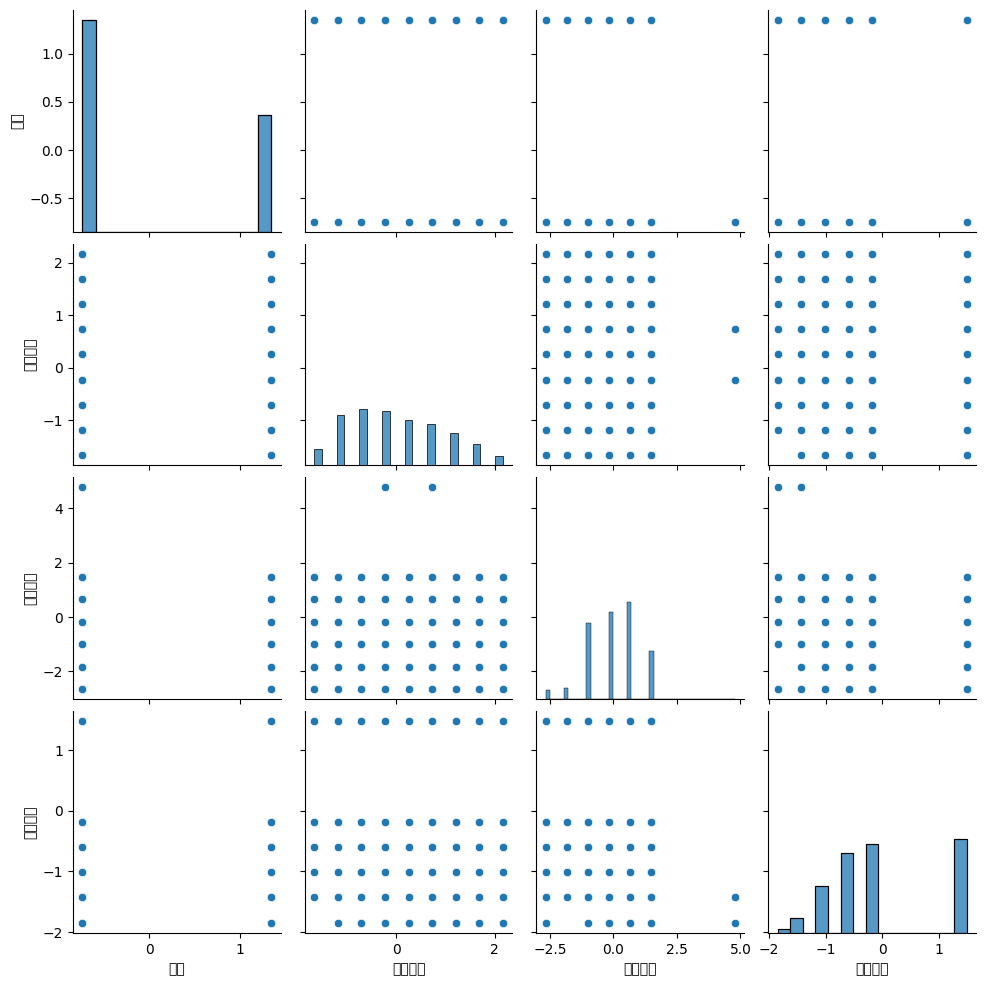

In [ ]:
# 데이터 시각화
sns.pairplot(df_sc_sp)

In [ ]:
# 엘보우 함수를 통한 군집 개수 선정
def change_n_clusters(n_clusters, data):
    sum_of_squared_distance=[]
    for n_cluster in n_clusters:
        kmeans = KMeans(n_clusters = n_cluster)
        kmeans.fit(data)
        sum_of_squared_distance.append(kmeans.inertia_)
        print(kmeans.inertia_)
        
    plt.figure(1, figsize=(15,8))
    plt.plot(n_clusters, sum_of_squared_distance, '*')
    plt.plot(n_clusters, sum_of_squared_distance, '-', alpha=0.5)
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')

In [ ]:
n_clusters = [2,3,4,5,6,7,8]

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


18549.98028148242
14443.202141452291
12234.675842442124


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


10416.74959952875


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


9045.82515483469


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


7957.303863906862


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


7186.972146891005


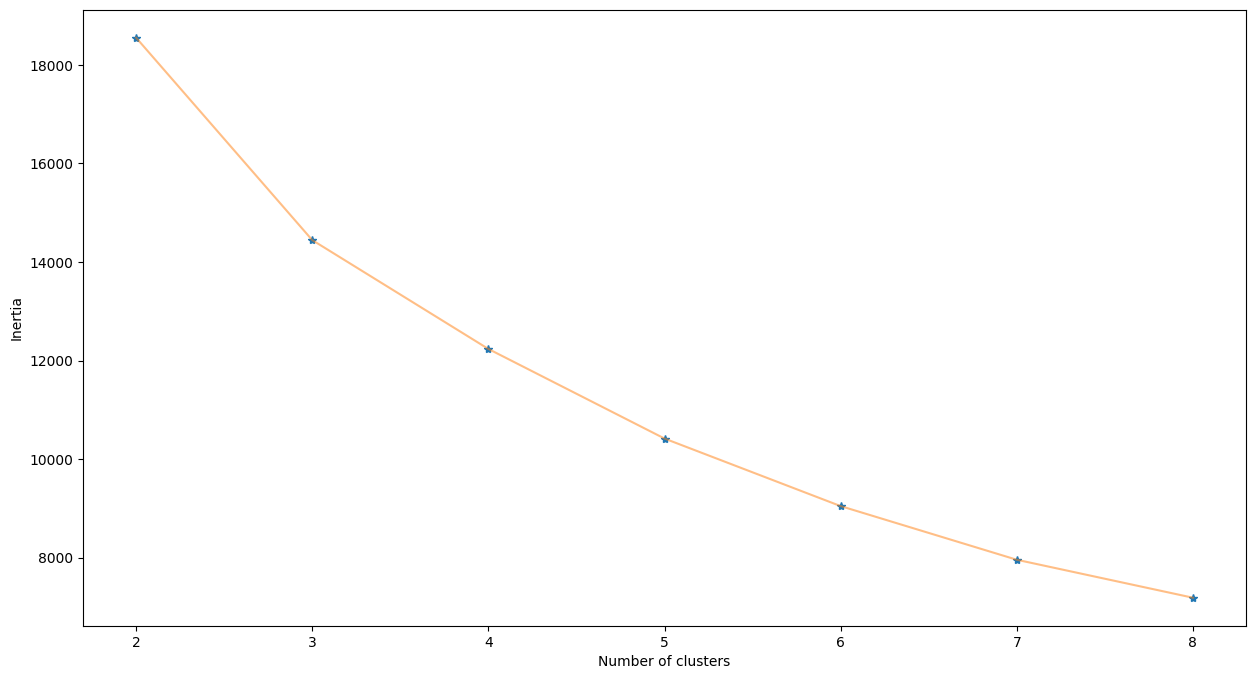

In [ ]:
change_n_clusters(n_clusters, df_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

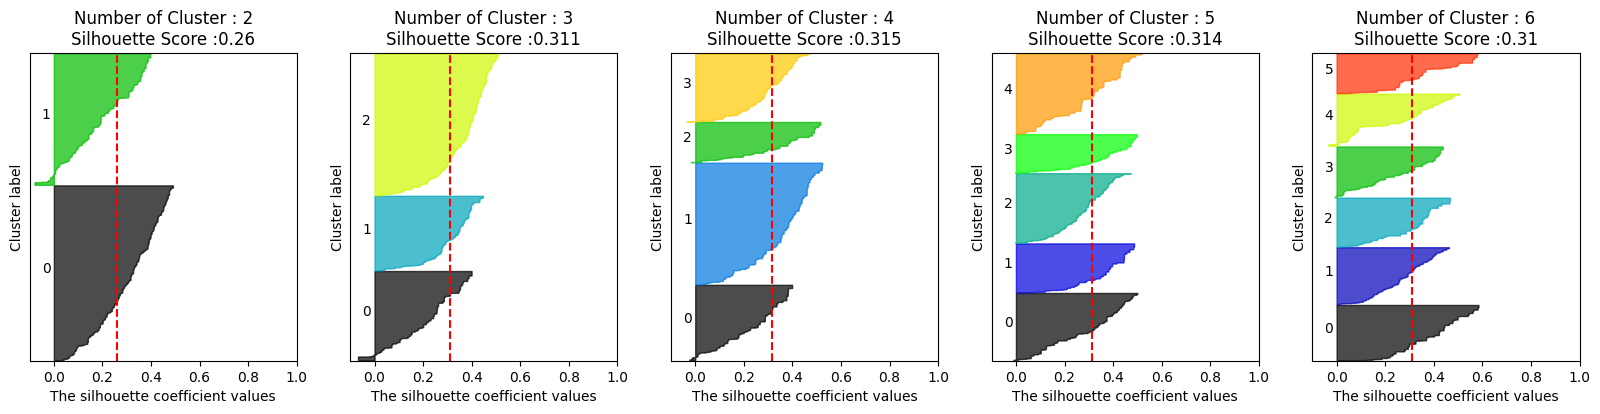

In [ ]:
# 실루엣 계수를 활용한 군집화 개수 선정
def visualize_silhouette(cluster_lists, X_features): 

    from sklearn.datasets import make_blobs
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")


visualize_silhouette([2,3,4,5,6], df_scaled)

In [ ]:
# 엘보우 함수와 실루엣 계수를 이용해 시각화해본 결과 군집 개수는 3개가 가장 적합하다고 판단
# 따라서 3개의 군집으로 군집화
kmeans = KMeans(n_clusters=3, random_state=111)
clusters = kmeans.fit(df_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df_sc_sp['cluster'] = clusters.labels_

In [ ]:
df_sc_sp

,성별,연령구간,투자성향,고객등급,cluster
0,-0.741844,0.731058,0.648658,-1.427963,0
1,1.347993,1.210988,0.648658,-0.181521,2
2,1.347993,0.731058,0.648658,-1.012483,2
3,-0.741844,0.251127,-1.003210,-0.181521,0
4,-0.741844,0.251127,-0.177276,-0.597002,0
...,...,...,...,...,...
6294,-0.741844,0.251127,-0.177276,1.480401,1
6295,-0.741844,2.170849,0.648658,-0.181521,0
6296,1.347993,-1.188664,-0.177276,1.480401,1
6297,1.347993,1.210988,0.648658,-0.181521,2


In [ ]:
# 군집별 시각화 > PCA를 활용해 2차원 변환 
from sklearn.decomposition import PCA
X = df_scaled.copy()

# PCA 적용
pca = PCA(n_components = 2)
pca.fit(X)

x_pca = pca.transform(X)
x_pca

array([[ 1.8045024 , -0.20033772],
       [ 0.72059538,  1.57733159],
       [ 0.99651178,  1.44958025],
       ...,
       [-1.98109645,  0.34214503],
       [ 0.72059538,  1.57733159],
       [-0.19825525,  0.55197199]])

In [ ]:
pca_df = pd.DataFrame(x_pca)

In [ ]:
pca_df['cluster'] =df_sc_sp['cluster']

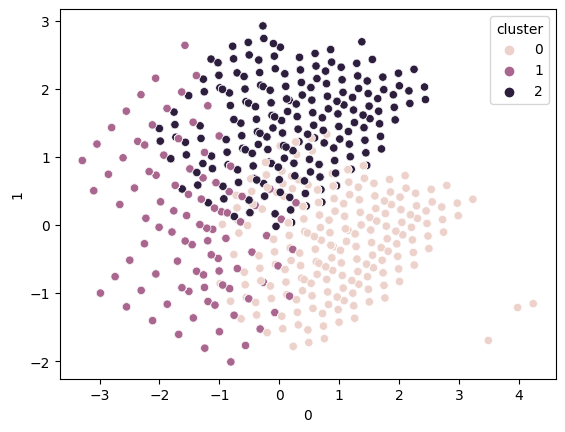

In [ ]:
axs = plt.subplots()
axs = sns.scatterplot(x=0,y=1, hue='cluster',data=pca_df)

In [ ]:
df_sp['cluster'] = clusters.labels_
df_sp

,성별,연령구간,투자성향,고객등급,cluster
1,1,6,4,2,0
2,2,7,4,5,2
3,2,6,4,3,2
4,1,5,2,5,0
5,1,5,3,4,0
...,...,...,...,...,...
9994,1,5,3,9,1
9995,1,9,4,5,0
9996,2,2,3,9,1
9997,2,7,4,5,2


In [ ]:
one = df_sp[df_sp['cluster'] == 1]
one

,성별,연령구간,투자성향,고객등급,cluster
13,1,5,4,9,1
39,1,8,3,9,1
51,1,3,4,9,1
56,2,3,2,9,1
57,1,4,5,9,1
...,...,...,...,...,...
9986,1,3,4,9,1
9991,1,5,5,9,1
9992,2,3,3,9,1
9994,1,5,3,9,1


/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47161 (\N{HANGUL SYLLABLE RYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53804 (\N{HANGUL SYLLABLE TU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPyt

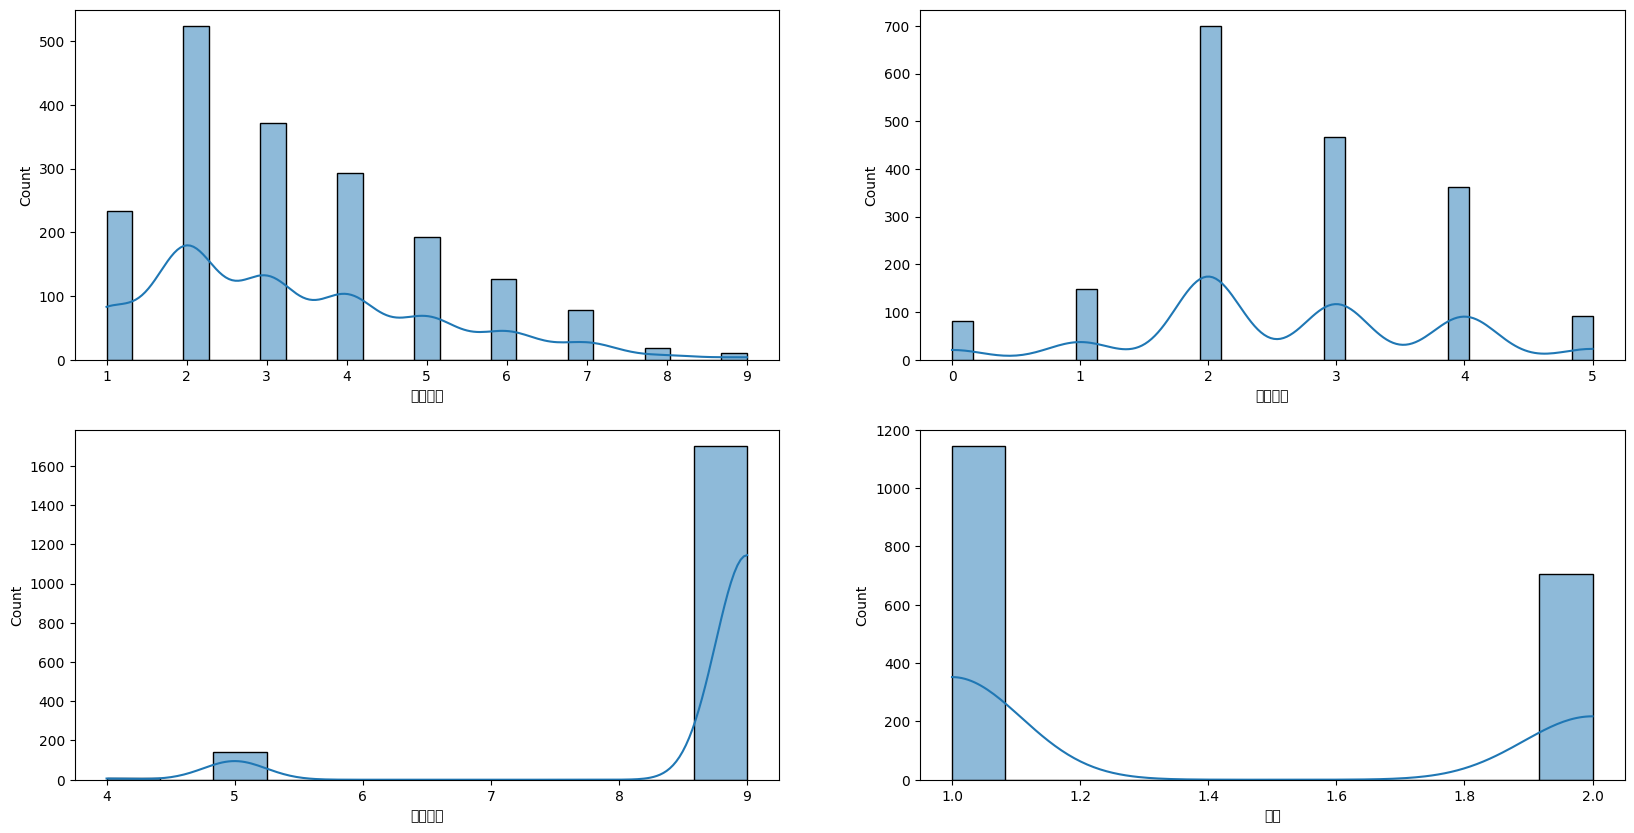

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(20,10))

sns.histplot(x=one['연령구간'],kde=True,ax=axes[0][0])
sns.histplot(x=one['투자성향'],kde=True,ax=axes[0][1])
sns.histplot(x=one['고객등급'],kde=True,ax=axes[1][0])
sns.histplot(x=one['성별'],kde=True,ax=axes[1][1])

plt.show()

In [ ]:
zero = df_sp[df_sp['cluster'] == 0]
zero

,성별,연령구간,투자성향,고객등급,cluster
1,1,6,4,2,0
4,1,5,2,5,0
5,1,5,3,4,0
8,1,4,3,3,0
9,1,5,5,3,0
...,...,...,...,...,...
9976,1,7,3,4,0
9980,1,3,5,5,0
9993,1,6,1,5,0
9995,1,9,4,5,0


/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47161 (\N{HANGUL SYLLABLE RYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53804 (\N{HANGUL SYLLABLE TU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPyt

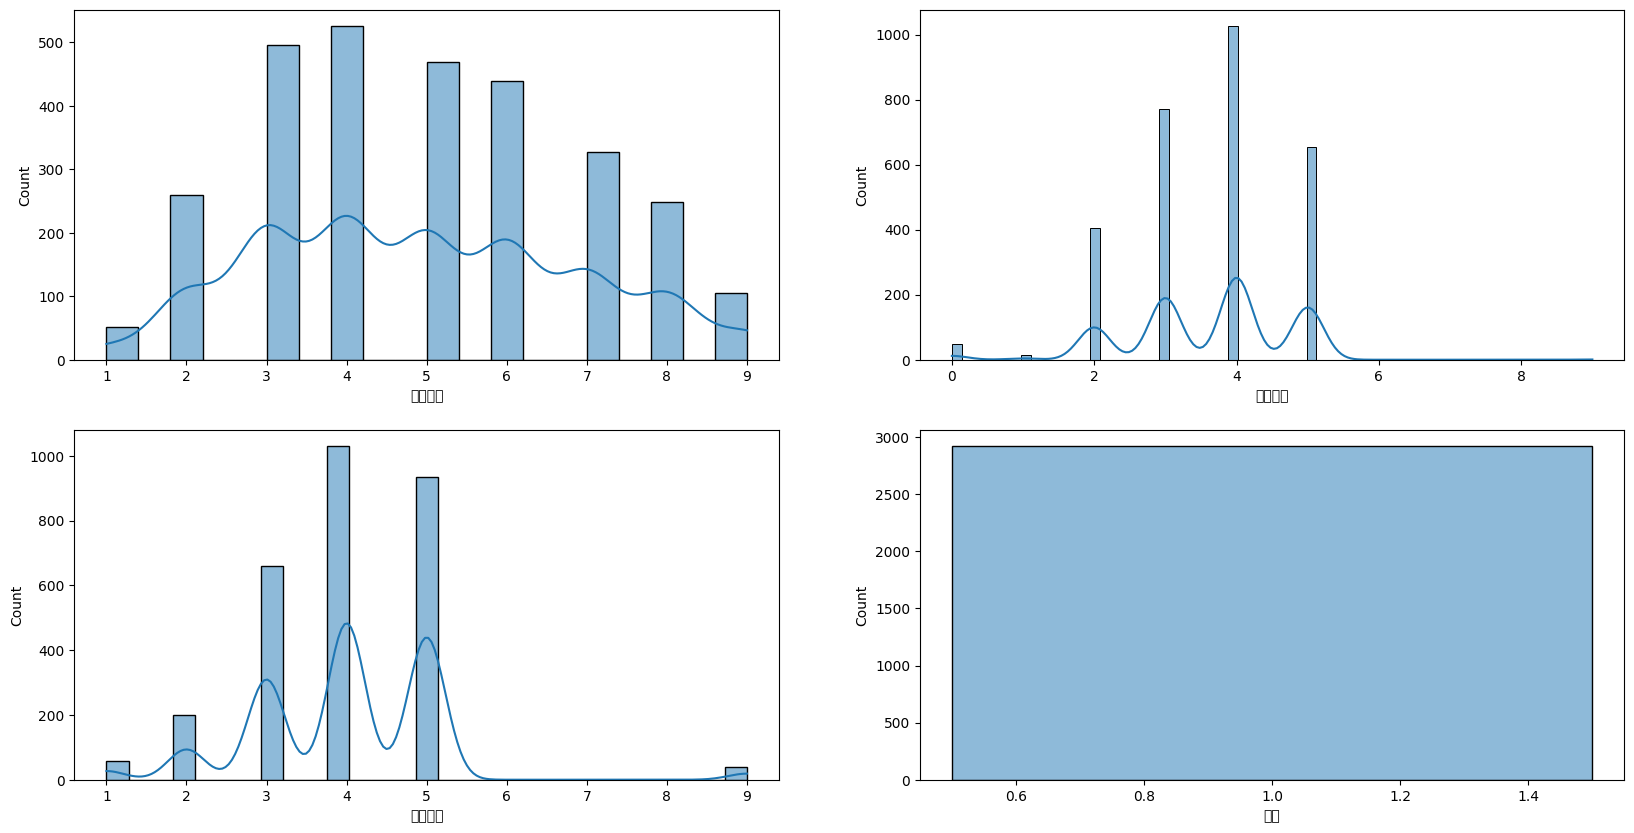

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(20,10))

sns.histplot(x=zero['연령구간'],kde=True,ax=axes[0][0])
sns.histplot(x=zero['투자성향'],kde=True,ax=axes[0][1])
sns.histplot(x=zero['고객등급'],kde=True,ax=axes[1][0])
sns.histplot(x=zero['성별'],kde=True,ax=axes[1][1])

plt.show()

In [ ]:
two = df_sp[df_sp['cluster'] == 2]
two

,성별,연령구간,투자성향,고객등급,cluster
2,2,7,4,5,2
3,2,6,4,3,2
7,2,4,3,3,2
18,2,9,2,4,2
23,2,9,3,3,2
...,...,...,...,...,...
9958,2,6,4,9,2
9962,2,2,2,4,2
9977,2,4,3,5,2
9983,2,7,4,9,2


/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47161 (\N{HANGUL SYLLABLE RYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53804 (\N{HANGUL SYLLABLE TU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPyt

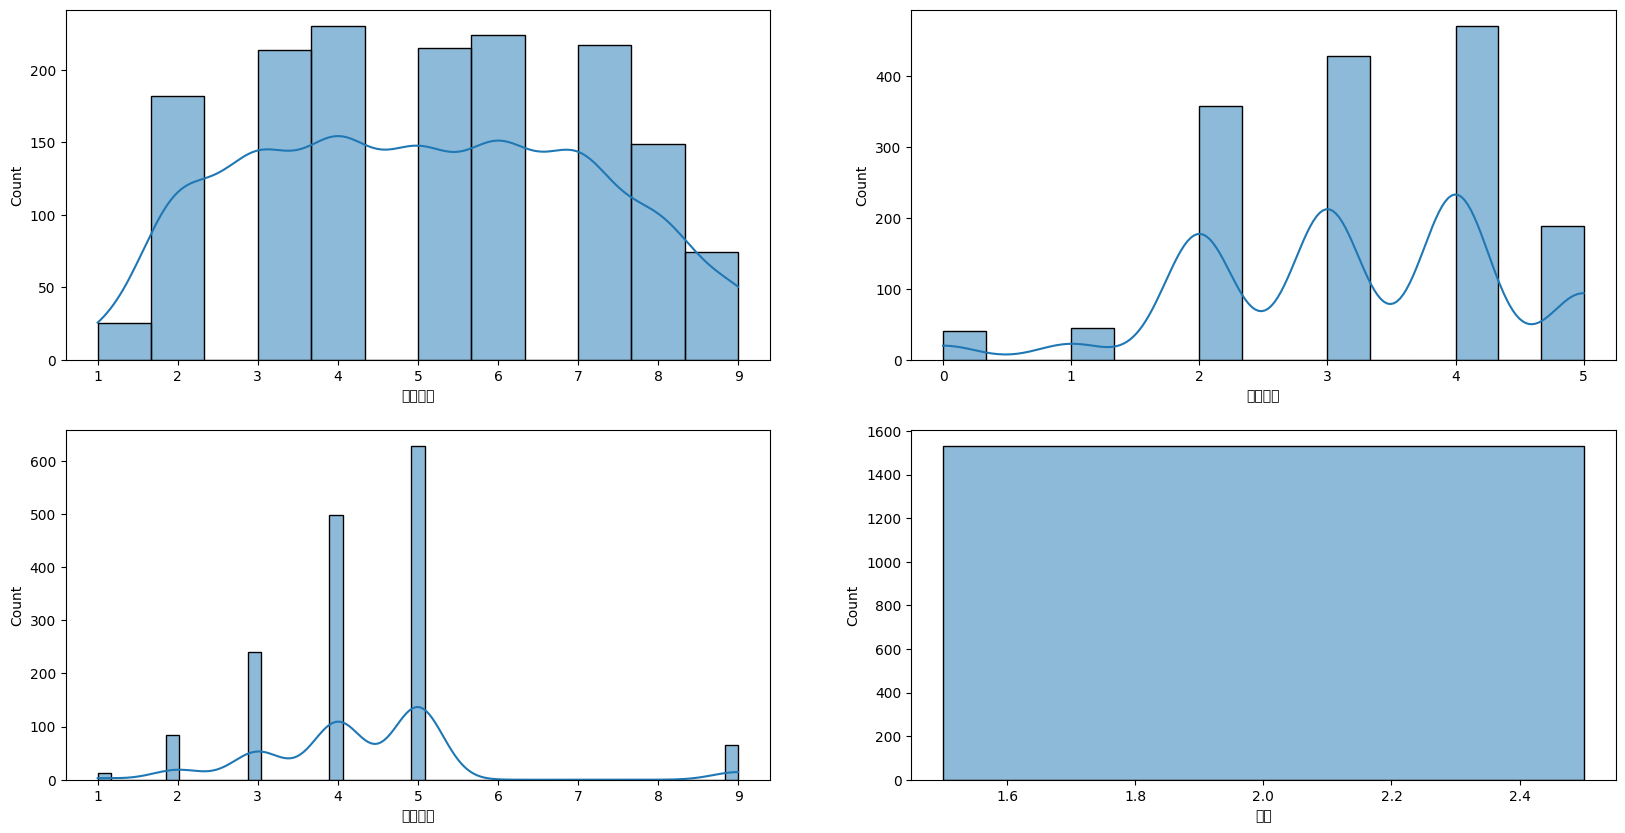

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(20,10))

sns.histplot(x=two['연령구간'],kde=True,ax=axes[0][0])
sns.histplot(x=two['투자성향'],kde=True,ax=axes[0][1])
sns.histplot(x=two['고객등급'],kde=True,ax=axes[1][0])
sns.histplot(x=two['성별'],kde=True,ax=axes[1][1])

plt.show()

## 결과 분석 

- 성별, 투자성향, 연령구간, 고객등급으로 3개의 군집을 나누어 본 결과 크게 비교적 나이가 있는 군집(2)과 나이가 어린 군집(1), 적극투자를 추구하는 군집(0)로 나누어 졌다.

1. 나이가 있는 군집은 40대 이상이 많았으며, 위험중립형 투자를 추구하였다. 또한 고객등급은 그린(자산 3천이상 or 수익기여도 50만원 이상)이 가장 많았으며, 남자와 여자가 골고루 있었다. 

2. 나이가 어린 군집은 40세 미만이 많았고 25세에서 30세 미만의 나이인 경우가 가장 많았으며, 안정추구형의 투자성향을 가진 고객이 많았다. 또한 고객 등급은 미정의인 경우가 많았으며, 그다음으로는 블루(자산 1천이상 또는 수익기여도 10만원 이상)인 경우가 많았다. 성별은 비슷했다. 

3. 적극투자를 추구하는 군집은 나이는 비교적 다양했으며, 적극투자 및 공격투자를  추구하였다. 또한 고객등급은 그린(자산 3천이상 or 수익기여도 50만원 이상)이 가장 많았으며, 대부분 남자였다. 

In [ ]:
# 나이가 많을 수록 가지고 있는 자본이 많은 만큼 하이리스크 하이리턴 방식의 투자 성향이 많은 것 같다.
# 반대로 나이가 어릴 수록 작은 돈에 민감하다 보니 안정적 투자를 원하는 고객이 많았다.
# 나이와 상관없이 여자보다는 남자가 적극투자를 하는 사람이 많았다. 

# 따라서 연령이 높고 남자 고객같은 위험 부담이 있더라도 높은 수익률을 낼 수 있는 선물, 펀드 등을 홍보하고 
# 연령이 낮고 여자 고객같은 경우는 위험 부담이 비교적 적은 코스피 위주의 국내 주식투자 등을 홍보하면 좋을 것 같다. 